In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA


Shape del dataset: (1797, 64)


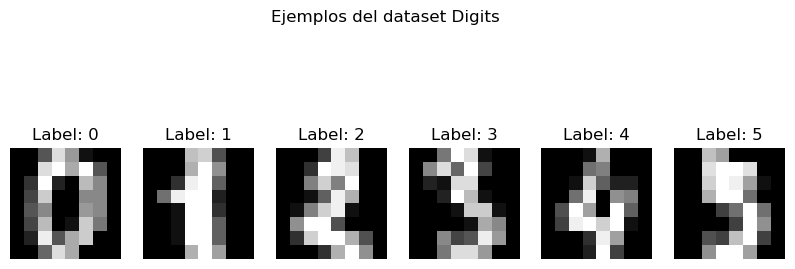

In [16]:
# Cargar dataset Digits
digits = load_digits()
X = digits.data
y = digits.target
target_names = digits.target_names

print("Shape del dataset:", X.shape)

# Mostrar algunas imágenes
fig, axes = plt.subplots(1, 6, figsize=(10,4))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis("off")
plt.suptitle("Ejemplos del dataset Digits")
plt.show()


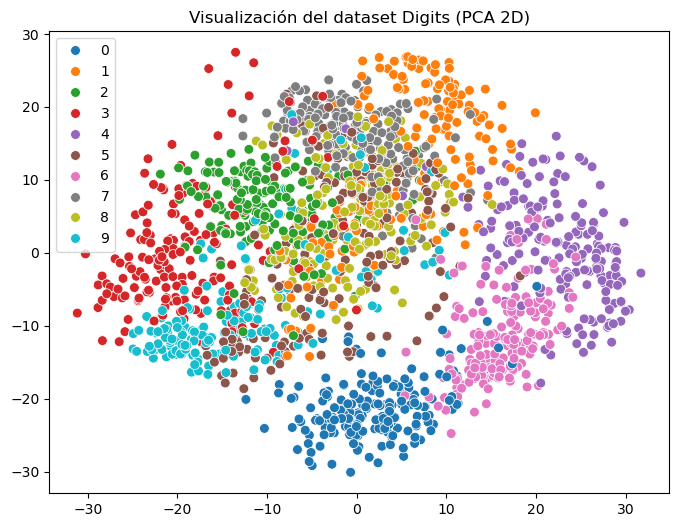

In [17]:
# Reducir a 2D con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="tab10", s=50, legend="full")
plt.title("Visualización del dataset Digits (PCA 2D)")
plt.show()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [19]:
# Entrenar LinearSVC
svc = LinearSVC(max_iter=5000, random_state=42)
svc.fit(X_train, y_train)

# Predicciones
y_pred = svc.predict(X_test)


Accuracy: 0.9462962962962963
Precision: 0.9479900233245461
Recall: 0.9461059799739046
F1 Score: 0.9460135125775644


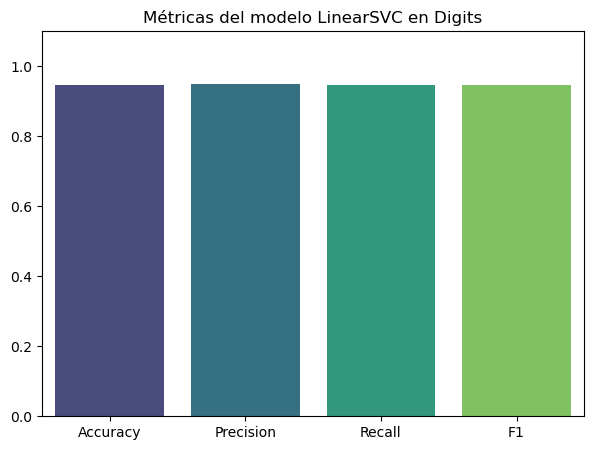

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Gráfica de métricas
metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}

plt.figure(figsize=(7,5))
sns.barplot(
    x=list(metrics.keys()),
    y=list(metrics.values()),
    hue=list(metrics.keys()),  # para evitar FutureWarning
    palette="viridis",
    legend=False
)
plt.ylim(0,1.1)
plt.title("Métricas del modelo LinearSVC en Digits")
plt.show()


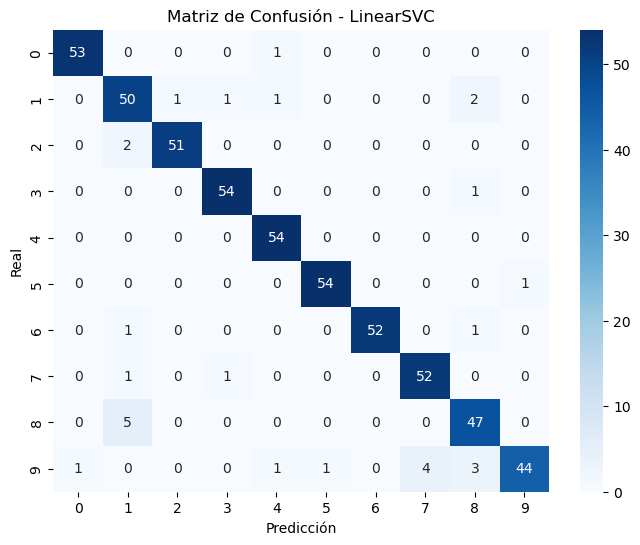

In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - LinearSVC")
plt.show()


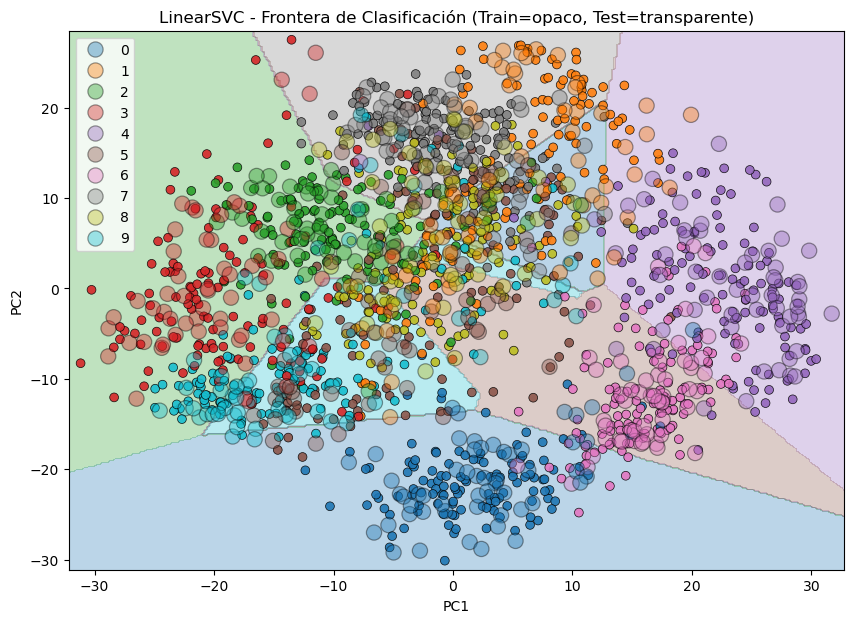

In [30]:
# Reducir a 2D con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenar modelo
svc_2d = LinearSVC(max_iter=5000, random_state=42)
svc_2d.fit(X_train_pca, y_train)

# Malla
x_min, x_max = X_pca[:,0].min() - 1, X_pca[:,0].max() + 1
y_min, y_max = X_pca[:,1].min() - 1, X_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = svc_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Graficar
plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="tab10")

# Train = opaco y pequeño
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1],
                hue=y_train, palette="tab10", s=40, alpha=0.9, edgecolor="k", legend=False)

# Test = transparente y grande
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1],
                hue=y_test, palette="tab10", s=120, alpha=0.4, edgecolor="k", legend='brief')

plt.title("LinearSVC - Frontera de Clasificación (Train=opaco, Test=transparente)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [23]:
from sklearn.neural_network import MLPClassifier

# Crear y entrenar MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predicciones
y_pred_mlp = mlp.predict(X_test)


Accuracy (MLP): 0.975925925925926
Precision (MLP): 0.9763806165099268
Recall (MLP): 0.9756034706034706
F1 Score (MLP): 0.975626496042989


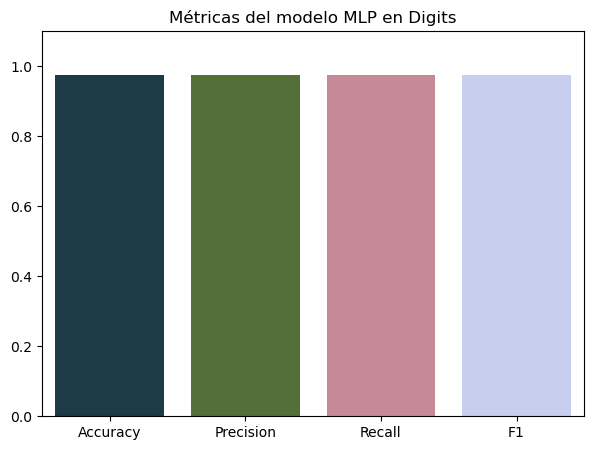

In [24]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average="macro")
recall_mlp = recall_score(y_test, y_pred_mlp, average="macro")
f1_mlp = f1_score(y_test, y_pred_mlp, average="macro")

print("Accuracy (MLP):", accuracy_mlp)
print("Precision (MLP):", precision_mlp)
print("Recall (MLP):", recall_mlp)
print("F1 Score (MLP):", f1_mlp)

# Gráfica de métricas
metrics_mlp = {
    "Accuracy": accuracy_mlp,
    "Precision": precision_mlp,
    "Recall": recall_mlp,
    "F1": f1_mlp
}

plt.figure(figsize=(7,5))
sns.barplot(
    x=list(metrics_mlp.keys()),
    y=list(metrics_mlp.values()),
    hue=list(metrics_mlp.keys()),
    palette="cubehelix",
    legend=False
)
plt.ylim(0,1.1)
plt.title("Métricas del modelo MLP en Digits")
plt.show()


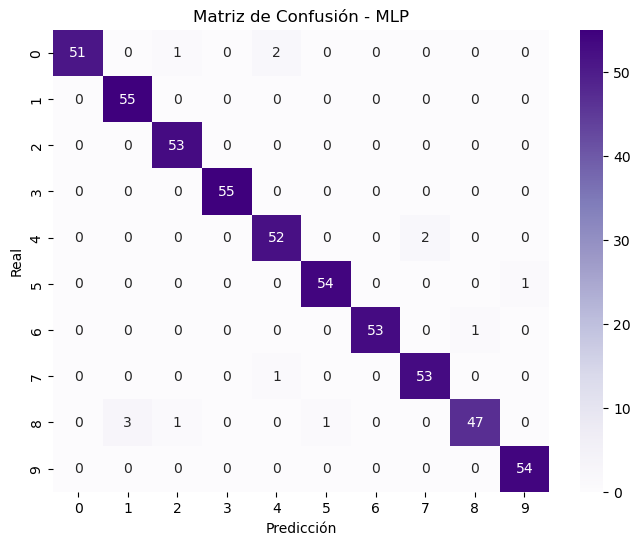

In [25]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Purples",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - MLP")
plt.show()


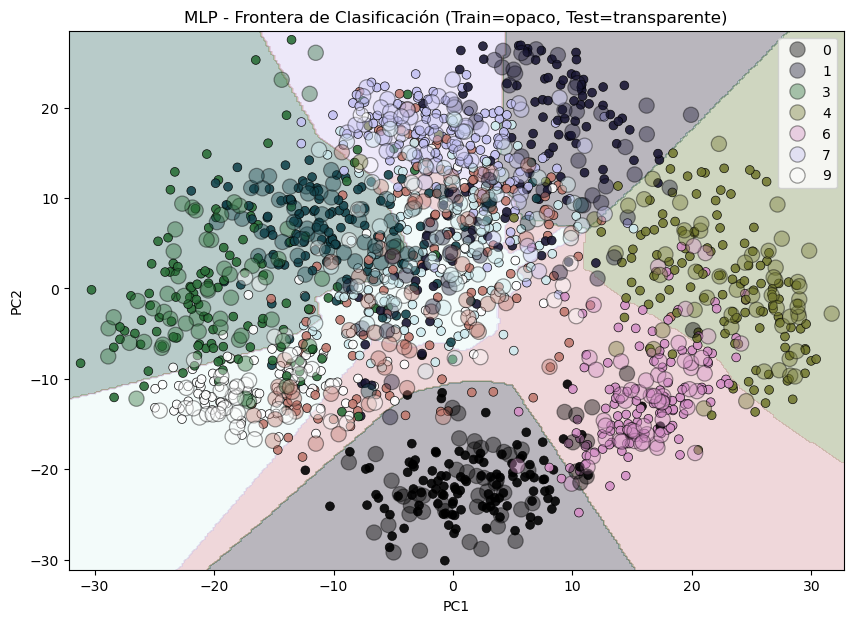

In [32]:
mlp_2d = MLPClassifier(hidden_layer_sizes=(50,), max_iter=2000, random_state=42)
mlp_2d.fit(X_train_pca, y_train)

Z = mlp_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="cubehelix")

# Train
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1],
                hue=y_train, palette="cubehelix", s=40, alpha=0.9, edgecolor="k", legend=False)

# Test
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1],
                hue=y_test, palette="cubehelix", s=120, alpha=0.4, edgecolor="k", legend='brief')

plt.title("MLP - Frontera de Clasificación (Train=opaco, Test=transparente)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

